# 使用梯度下降法训练SVM

## 定义线性模型

$$
f(x)=W^TX+b
$$
$$ g(x)= \begin{cases} f(x)>0, & \text {Output=+1} \\ f(x)<0, & \text{Output=-1} \end{cases} $$


## 定义损失函数
理想的损失函数应该是加总所有预测错误的样例
$$
L(f)=\sum_n{\delta(g(x)\neq \hat{y}^n)}
$$
然而，这样的函数无法使用梯度下降求解，使用Hinge Loss近似理想损失
$$
L(f)=\sum_n{l(f(x^n), \hat{y}^n)} + \lambda||W||_2 \\
l(f(x^n), \hat{y}^n)=max(0,1-\hat{y}^nf(x^n))
$$

Hinge Loss 的函数图形如下

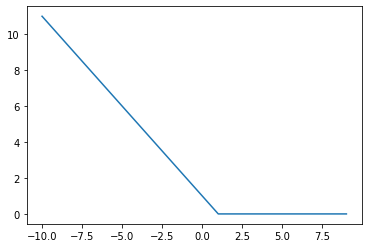

In [59]:
import numpy as np
x = np.asarray(range(-10, 10)).reshape([1, -1])
l = np.max(np.concatenate([np.zeros([1, x.shape[1]]), 1-x], axis=0), axis=0).reshape([-1])
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x.reshape([-1]), l)

## 梯度下降
为了简便，以下省略正则项 
$$ L(f)=\sum_n{l(f(x^n), \hat{y}^n)} \qquad l(f(x^n), \hat{y}^n)=max(0,1-\hat{y}^nf(x^n)) \\
\frac{\partial l(f(x^n),\hat{y}^n)}{\partial w_i}=\frac{\partial l(f(x^n),\hat{y}^n)}{\partial f(x^n)} \frac{\partial f(x^n)}{\partial w_i}
$$
其中 $f(x^n)=w^T  x^n$ 则 $\frac{\partial f(x^n)}{\partial w_i}=x^n_i
$
$$
\frac{\partial max(0, 1-\hat{y}^nf(x^n))}{\partial f(x^n)}=\begin{cases} -\hat{y}^n, & \text {if $\hat{y}^nf(x^n)<1$} \\ 0, & \text{otherwise} \end{cases}
$$
综上
$$
\frac{\partial L(f)}{\partial w_i}=\sum_n{-\delta(\hat{y}^nf(x^n)<1)\hat{y}^nx_i}
$$
将$-\delta(\hat{y}^nf(x^n)<1)\hat{y}^n$记做$c^n(w)$
可以得到w的更新公式
$$
w_i \leftarrow w_i - \eta \sum_n{c^n(w)x_i^n}
$$

In [ ]:
class SVM:
    def __init__(self, lr_rate):
        self.w = None
        self.lr_rate = lr_rate
    
    def normalize(self, data):
        m = np.mean(data, axis=0)
        mx = np.max(data, axis=0)
        mn = np.min(data, axis=0)
        return (data - m.reshape([1, 30])) / (mx.reshape([1, -1]) - mn.reshape([1, -1]))
    
    def fit(self, x, y):
        dim = x.shape[1]
        x = self.normalize(x)
        x = x.T
        x = np.concatenate([x, np.ones([1, x.shape[1]])])
        y = y + -1*(y==0).astype(np.int)
        self.w = np.random.randn(dim+1)
        for _ in range(20000):
            fx = np.dot(self.w, x)
            gradient = np.sum(-1 * (np.multiply(y, fx)<1).astype(np.float64) * y * x, axis=-1)
            self.w = self.w - self.lr_rate * gradient
            y_pred = np.round(np.dot(self.w, x)).astype(np.int)
            y_pred = np.zeros(y_pred.shape) + (y_pred>0).astype(np.int) - 1 * (y_pred<0).astype(np.int)
        print(accuracy_score(y, y_pred)) 
        
    def test(self, x, y):
        x = self.normalize(x)
        x = x.T
        x = np.concatenate([x, np.ones([1, x.shape[1]])])
        y = y + -1*(y==0).astype(np.int)
        y_pred = np.round(np.dot(self.w, x)).astype(np.int)
        y_pred = np.zeros(y_pred.shape) + (y_pred>0).astype(np.int) - 1 * (y_pred<0).astype(np.int)
        print(accuracy_score(y, y_pred)) 

In [ ]:
import numpy.random
from sklearn.datasets import load_breast_cancer

## 使用sklearn的乳腺癌数据

In [66]:
dataset = load_breast_cancer()

In [2]:
from sklearn.metrics import accuracy_score  

In [8]:
svm = SVM(0.001)
len_data = len(dataset['data'])
len_target = len(dataset['target'])
svm.fit(dataset['data'][:int(3/4*len_data)], dataset['target'][:int(3/4*len_target)])
svm.test(dataset['data'][int(3/4*len_data):], dataset['target'][int(3/4*len_target):])

0.971830985915493
0.8531468531468531


In [10]:
dataset['data'].shape

(569, 30)

In [166]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

In [164]:
def svm_c(x_train, x_test, y_train, y_test):
    # rbf核函数，设置数据权重
    svc = SVC(kernel='rbf', class_weight='balanced',)
    c_range = np.logspace(-5, 15, 11, base=2)
    gamma_range = np.logspace(-9, 3, 13, base=2)
    # 网格搜索交叉验证的参数范围，cv=3,3折交叉
    param_grid = [{'kernel': ['rbf'], 'C': c_range, 'gamma': gamma_range}]
    grid = GridSearchCV(svc, param_grid, cv=3, n_jobs=-1)
    # 训练模型
    clf = grid.fit(x_train, y_train)
    # 计算测试集精度
    score = grid.score(x_test, y_test)
    print('精度为%s' % score)

In [167]:
svm_c(dataset['data'][:int(3/4*len_data)], dataset['data'][int(3/4*len_data):], dataset['target'][:int(3/4*len_target)], dataset['target'][int(3/4*len_target):])

精度为0.8531468531468531
